In [4]:
import darshan
import pprint

In [5]:
report = darshan.DarshanReport("example.darshan")

By default only metadata, available modules and the name records are loaded:

In [6]:
report.data

{'version': 1,
 'metadata': {'job': {'jobid': 4478544,
   'uid': 69615,
   'start_time': 1490000867,
   'end_time': 1490000983,
   'metadata': {'lib_ver': '3.1.3', 'h': 'romio_no_indep_rw=true;cb_nodes=4'}},
  'exe': '/global/project/projectdirs/m888/glock/tokio-abc-results/bin.edison/vpicio_uni /scratch2/scratchdirs/glock/tokioabc-s.4478544/vpicio/vpicio.hdf5 32'},
 'records': {},
 'summary': {},
 'mounts': [('/.shared/base/default/etc/dat.conf', 'dvs'),
  ('/usr/lib64/libibverbs.so.1.0.0', 'dvs'),
  ('/usr/lib64/libibumad.so.3.0.2', 'dvs'),
  ('/usr/lib64/librdmacm.so.1.0.0', 'dvs'),
  ('/usr/lib64/libibgni.so.1.0.0', 'dvs'),
  ('/global/cscratch1', 'lustre'),
  ('/global/projectb', 'dvs'),
  ('/global/projecta', 'dvs'),
  ('/usr/sbin/ibstat', 'dvs'),
  ('/global/project', 'dvs'),
  ('/global/common', 'dvs'),
  ('/global/syscom', 'dvs'),
  ('/global/dna', 'dvs'),
  ('/opt/slurm', 'dvs'),
  ('/global/u1', 'dvs'),
  ('/global/u2', 'dvs'),
  ('/scratch1', 'lustre'),
  ('/scratch2', 'lus

### Loading Additional Records

Additional records can be loaded for example on a per module basis:

In [4]:
# expected to fail
report.data['records']['POSIX']

KeyError: 'POSIX'

In [5]:
report.mod_read_all_records("POSIX") 

In [6]:
report.data['records']['POSIX']

[{'id': 6301063301082038805,
  'rank': -1,
  'counters': array([                2049, 18446744073709551615, 18446744073709551615,
                            0,                16402,                16404,
                            0,                    0,                    0,
                            0, 18446744073709551615, 18446744073709551615,
                            0,                    0,                    0,
                2199023259968,                    0,        2199023261831,
                            0,                    0,                    0,
                        16384,                    0,                    0,
                            8,                16401,              1048576,
                            0,            134217728,                    0,
                            0,                    0,                    0,
                            0,                    0,                    0,
                            0,               

### Aggregation (Experimental)

Darshan log data is routinely aggregated for quick overview. The report object offers a few methods to perform common aggregations:

In [7]:
import darshan
report = darshan.DarshanReport("example.darshan")

Report aggregations and summarization remains experimental for now, mostly to allow interfaces to stabilize. Experimental features can be switched on easily by invoking:

In [8]:
darshan.enable_experimental()

Added method create_time_summary to DarshanReport.
Added method summarize to DarshanReport.
Added method create_timeline to DarshanReport.
Added method agg_ioops to DarshanReport.
Added method create_sankey to DarshanReport.
Added method mod_agg_iohist to DarshanReport.


In [9]:
# expected to fail
report.data['agg_ioops']

KeyError: 'agg_ioops'

In [10]:
report.read_all() 
report.summarize()

Skipping. Currently unsupported: LUSTRE in mod_read_all_records().
Skipping. Currently unsupported: POSIX
Skipping. Currently unsupported: MPI-IO
Skipping. Currently unsupported: LUSTRE
Skipping. Currently unsupported: STDIO


In [11]:
# attaches among other summarizes the aggregated ioops
report.data['agg_ioops']

{'MPI-IO': {'MPIIO_INDEP_OPENS': 0,
  'MPIIO_COLL_OPENS': 2048,
  'MPIIO_INDEP_READS': 0,
  'MPIIO_INDEP_WRITES': 18,
  'MPIIO_COLL_READS': 0,
  'MPIIO_COLL_WRITES': 16384,
  'MPIIO_SPLIT_READS': 0,
  'MPIIO_SPLIT_WRITES': 0,
  'MPIIO_NB_READS': 0,
  'MPIIO_NB_WRITES': 0,
  'MPIIO_SYNCS': 0,
  'MPIIO_HINTS': 0,
  'MPIIO_VIEWS': 32768,
  'MPIIO_MODE': 9,
  'MPIIO_BYTES_READ': 0,
  'MPIIO_BYTES_WRITTEN': 2199023259968,
  'MPIIO_RW_SWITCHES': 0,
  'MPIIO_MAX_READ_TIME_SIZE': 0,
  'MPIIO_MAX_WRITE_TIME_SIZE': 134217728,
  'MPIIO_SIZE_READ_AGG_0_100': 0,
  'MPIIO_SIZE_READ_AGG_100_1K': 0,
  'MPIIO_SIZE_READ_AGG_1K_10K': 0,
  'MPIIO_SIZE_READ_AGG_10K_100K': 0,
  'MPIIO_SIZE_READ_AGG_100K_1M': 0,
  'MPIIO_SIZE_READ_AGG_1M_4M': 0,
  'MPIIO_SIZE_READ_AGG_4M_10M': 0,
  'MPIIO_SIZE_READ_AGG_10M_100M': 0,
  'MPIIO_SIZE_READ_AGG_100M_1G': 0,
  'MPIIO_SIZE_READ_AGG_1G_PLUS': 0,
  'MPIIO_SIZE_WRITE_AGG_0_100': 4,
  'MPIIO_SIZE_WRITE_AGG_100_1K': 14,
  'MPIIO_SIZE_WRITE_AGG_1K_10K': 0,
  'MPIIO_SIZE_W

Or fine grained:

In [6]:
report.mod_agg_iohist("MPI-IO")  # to create the histograms

In [7]:
report.agg_ioops()               # to create the combined operation type summary

## Plotting

Summarizing... iohist POSIX


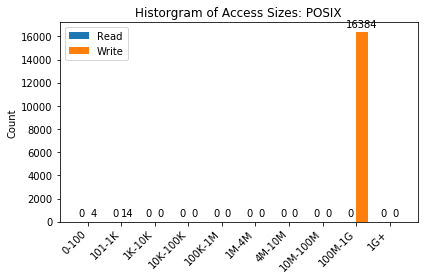

In [8]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('POSIX')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='POSIX')

Summarizing... iohist MPI-IO


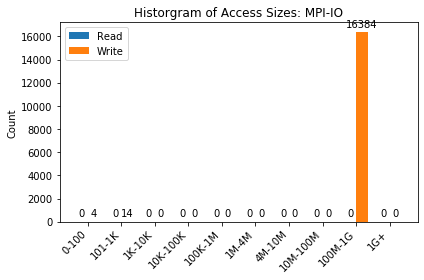

In [9]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.mod_read_all_records('MPI-IO')

from darshan.experimental.plots.matplotlib import plot_access_histogram
plot_access_histogram(r3, mod='MPI-IO')

Skipping. Currently unsupported: LUSTRE in mod_read_all_records().
Skipping. Currently unsupported: POSIX in mod_read_all_dxt_records().
Skipping. Currently unsupported: MPI-IO in mod_read_all_dxt_records().
Skipping. Currently unsupported: LUSTRE in mod_read_all_dxt_records().
Skipping. Currently unsupported: STDIO in mod_read_all_dxt_records().
Summarizing... agg_ioops


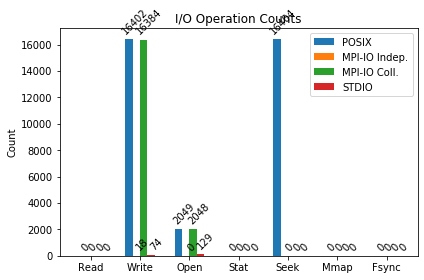

In [1]:
import darshan
darshan.enable_experimental(verbose=False)

r3 = darshan.DarshanReport("example.darshan")
r3.read_all()

from darshan.experimental.plots.matplotlib import plot_opcounts
plot_opcounts(r3)

### DXT Records

DXT records are also supported, and can be loaded individually on a per module basis as follows:


In [ ]:
report2 = darshan.DarshanReport("example.darshan")
report2.mod_read_all_dxt_records("ABC") 

In [11]:
report2.data

NameError: name 'report2' is not defined

### Report Algebra

By overloading the addition operator, reports can be easily merge for a variety of counters.

Some choices to make though

In [48]:
r1 = darshan.DarshanReport("example.darshan")
r2 = darshan.DarshanReport("example2.darshan")
combined = r1 + r2
combined

### Error Handling?

Currently, playing with two modes, both have their pros and cons.

Generally, should expose errors and let users handle them. At the same time, just skipping invalid load requests does little harm but greatly improves convienince.

Could add a switch to enable disable these guard :/

In [10]:
report = darshan.DarshanReport("example.darshan")

In [12]:
report.mod_read_all_records("ABC") # Expect KeyError

KeyError: 'ABC'

In [13]:
report.mod_read_all_dxt_records("ABC") # Expect printed warning, but not exception

Skipping. Log does not contain data for mod: ABC
